In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
c1 = pd.read_csv('../data/ts_segment1.csv')
c2 = pd.read_csv('../data/ts_segment2.csv')
c3 = pd.read_csv('../data/ts_segment3.csv')
c4 = pd.read_csv('../data/ts_segment4.csv')

In [3]:
def clean_ts (df):
    df.columns = ['ds','y']
    df.ds = pd.to_datetime(df.ds).dt.strftime('%Y-%m')
    
    df['z_score'] = stats.zscore(df.y)
    df = df[(df.z_score >= -3) & (df.z_score <= 3)]
    df = df.drop(columns='z_score')
    return df

In [4]:
k1 = clean_ts(c1)
k2 = clean_ts(c2)
k3 = clean_ts(c3)
k4 = clean_ts(c4)

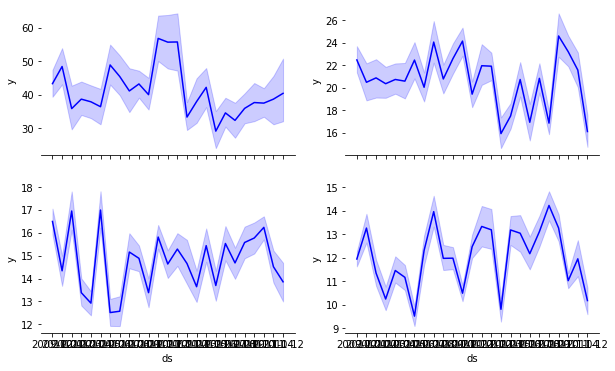

In [5]:
f, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
sns.despine(left=True)

sns.lineplot(data=k1, x='ds', y='y', color="b", ax=axes[0,0])
sns.lineplot(data=k2, x='ds', y='y', color="b", ax=axes[0,1])
sns.lineplot(data=k3, x='ds', y='y', color="b", ax=axes[1,0])
sns.lineplot(data=k4, x='ds', y='y', color="b", ax=axes[1,1])

plt.show();

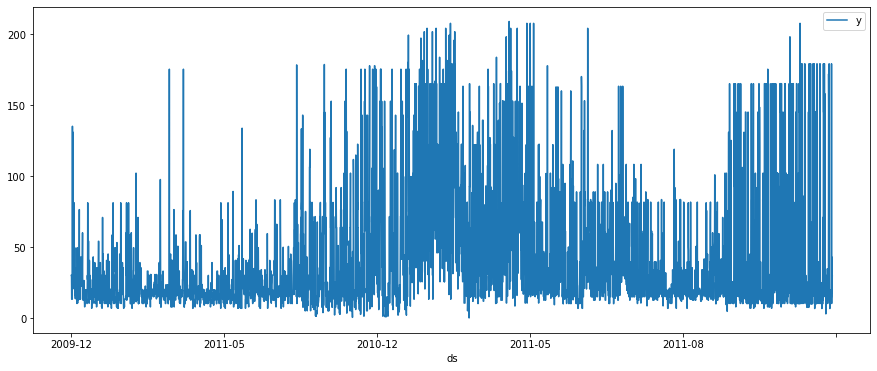

In [6]:
k1.set_index('ds').plot(figsize=(15,6))
plt.show()

In [ ]:
model = Prophet()
model.fit(k4)
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = model.plot_components(forecast)

In [ ]:
fig1_1 = model.plot(forecast, uncertainty = True)

In [ ]:
fig1_2 = model.plot(forecast)
a = add_changepoints_to_plot(fig1_2.gca(), model, forecast)